In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error   
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor 


import xgboost as xgb  

/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('Apple_Stock.csv') 
df = df.set_index('Date') 

df2 = df.loc[:,df.columns!='Close']
df2['Close']= df['Close']  

print(df2.shape) 
df2.head()

(3305, 7)


,Open,High,Low,Volume,Hourly Movement,Trade Value,Close
Date,,,,,,,
2021-08-02,146.360001,146.949997,145.270004,18637078,1.679993,2.723063e+09,145.910004
2021-08-02,145.910004,146.549896,145.410004,8769238,1.139893,1.280133e+09,146.529999
2021-08-02,146.538193,146.550003,145.558899,6754532,0.991104,9.865295e+08,145.630005
2021-08-02,145.630005,146.215393,145.561905,6731363,0.653488,9.820295e+08,146.044998
2021-08-02,146.049698,146.179993,145.740005,4299460,0.439987,6.275492e+08,145.970001


In [3]:


column_names = df2.columns 

x = df2.values 

index = df2.index

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled) 


df2.columns = column_names   
df2.index = index 

df2.head()

,Open,High,Low,Volume,Hourly Movement,Trade Value,Close
Date,,,,,,,
2021-08-02,0.350463,0.354714,0.342978,0.326489,0.170759,0.310324,0.346372
2021-08-02,0.343223,0.348266,0.345254,0.153622,0.109068,0.145886,0.356436
2021-08-02,0.353330,0.348268,0.347674,0.118328,0.092074,0.112426,0.341828
2021-08-02,0.338718,0.342875,0.347723,0.117922,0.053511,0.111914,0.348564
2021-08-02,0.345471,0.342304,0.350618,0.075319,0.029125,0.071516,0.347346


## Averaging

In [4]:
y1 = df2['Close']
X1 = df2.iloc[:,:-1]     

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.20, shuffle=False)   

model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()      

model_1.fit(X_train_1, y_train_1)
model_2.fit(X_train_1, y_train_1)
model_3.fit(X_train_1, y_train_1)   

pred_1 = model_1.predict(X_test_1)
pred_2 = model_2.predict(X_test_1)
pred_3 = model_3.predict(X_test_1)  

/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [19]:
pred_df = pd.DataFrame(y_test_1) 
pred_df['Linear Regression'] = pred_1 
pred_df['XGBRegressor'] = pred_2 
pred_df['Random Forest Regressor'] = pred_2  



pred_df.head()

,Close,Actual Close Value,Linear Regression,XGBRegressor,Random Forest Regressor
Date,,,,,
2023-02-01,0.289239,0.289239,0.292138,0.291613,0.291613
2023-02-01,0.340205,0.340205,0.318118,0.287959,0.287959
2023-02-01,0.339068,0.339068,0.349142,0.346752,0.346752
2023-02-02,0.396040,0.396040,0.393212,0.398626,0.398626
2023-02-02,0.413310,0.413310,0.415530,0.411164,0.411164


<AxesSubplot: xlabel='Date'>

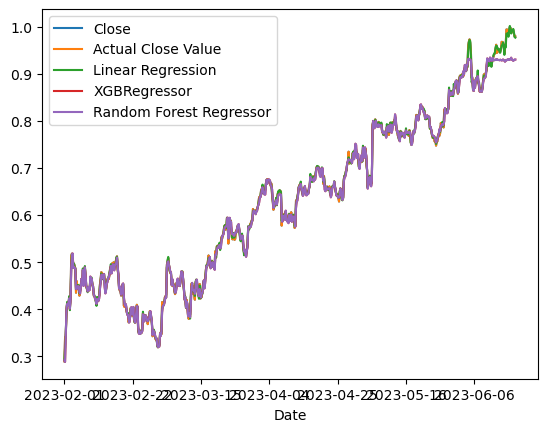

In [24]:
pred_df.plot()